In [1]:
import pandas as pd
import re
df_root = pd.read_csv('C:/Users/lui-m/Documents/GitHub/DS_Notebooks/ComunidadeDS/FTC_Python/datasets/train.csv')
df_root.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [2]:
# Fazendo cópia do dataframe lido
df = df_root.copy()

# Removendo espaço da string sem o loop for
df.loc[:, 'ID'] = df.loc[:, 'ID'].str.strip()
df.loc[:, 'Delivery_person_ID'] = df.loc[:, 'Delivery_person_ID'].str.strip()
df.loc[:, 'Road_traffic_density'] = df.loc[:, 'Road_traffic_density'].str.strip()
df.loc[:, 'Type_of_order'] = df.loc[:, 'Type_of_order'].str.strip()
df.loc[:, 'Type_of_vehicle'] = df.loc[:, 'Type_of_vehicle'].str.strip()
df.loc[:, 'City'] = df.loc[:, 'City'].str.strip()
# Excluindo as linhas com a idade dos entregadores vazia
linhas_nao_vazias = df['Delivery_person_Age'] != 'NaN '
df = df.loc[linhas_nao_vazias, :]

# Conversao de texto/categoria/string para numeros inteiros
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)

# Conversao de texto/categoria/string para numeros decimais
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)

# Conversao de texto para data
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y')

# Remove as linhas da coluna multiple_deliveries que tenham o conteúdo igual a 'NqN ' e fazendo o cast para inteiro
linhas_nao_vazias = df['multiple_deliveries'] != 'NaN '
df = df.loc[linhas_nao_vazias, :]
df['multiple_deliveries'] = df['multiple_deliveries'].astype(int)

#Removendo texto de números e resetando index
df = df.reset_index(drop=True)
for i in range(len(df)):
    df.loc[i, 'Time_taken(min)'] = re.findall(r'\d+', df.loc[i, 'Time_taken(min)'])
    df.loc[i, 'Time_taken(min)'] = int(df.loc[i, 'Time_taken(min)'][0])

# 1.0 Visão: Empresa

# 1. Qual a quantidade de pedidos por dia?

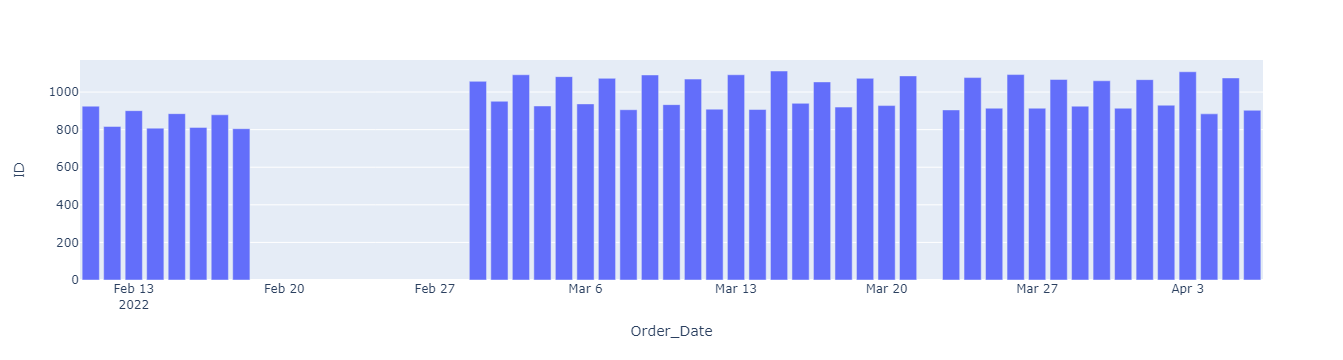

In [168]:
# colunas
cols = ['ID', 'Order_Date']

df_pedidos_dia = df.loc[:, cols].groupby(['Order_Date']).count().reset_index()
df_pedidos_dia.head()

# Desenhar o gráfico de linhas
# Plotly
import plotly.express as px
px.bar(df_pedidos_dia, x = 'Order_Date', y = 'ID')

# 2. Quantidade de pedidos por semana.

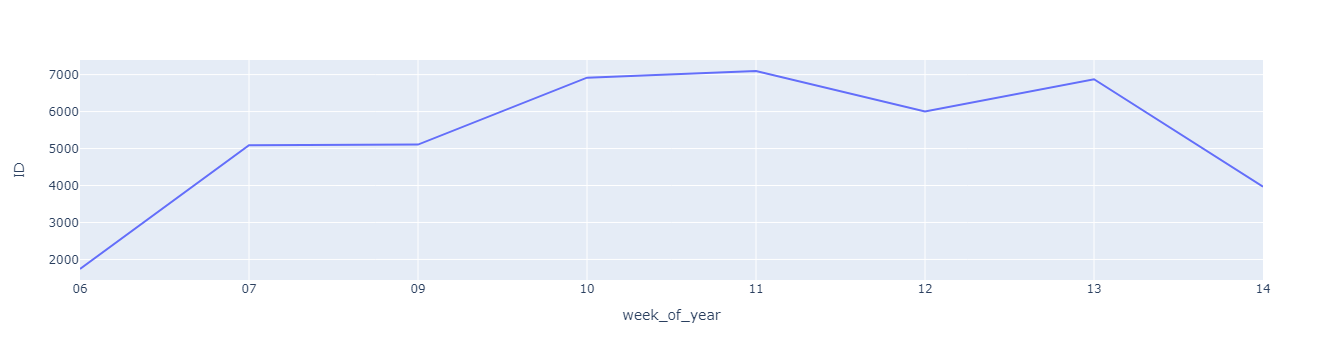

In [169]:
# criar a coluna semana
df['week_of_year'] = df['Order_Date'].dt.strftime('%U')

# Groupby de entregas por semana
cols = ['ID', 'week_of_year']

df_pedidos_semana = df.loc[:, cols].groupby(['week_of_year']).count().reset_index()

# Desenhando o gráfico
px.line(df_pedidos_semana, x = 'week_of_year', y = 'ID')

# 3. Distribuição dos pedidos por tipo de tráfego.

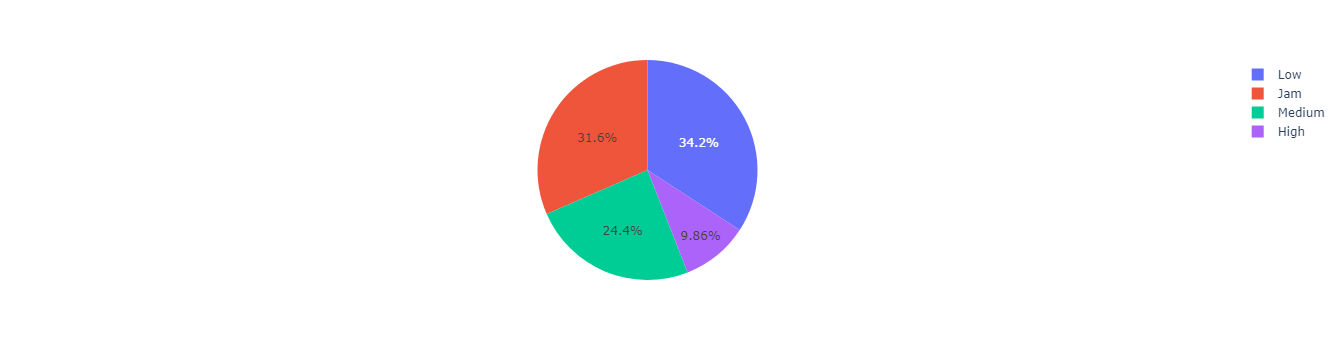

In [170]:
cols = ['ID', 'Road_traffic_density']

df_pedidos_trafego = df.loc[:, cols].groupby(['Road_traffic_density']).count().reset_index()

# Removendo valores NaN
df_pedidos_trafego = df_pedidos_trafego.loc[df_pedidos_trafego['Road_traffic_density'] != 'NaN', :]

df_pedidos_trafego['entregas_perc'] = df_pedidos_trafego['ID'] / df_pedidos_trafego['ID'].sum()

px.pie(df_pedidos_trafego, values='entregas_perc', names='Road_traffic_density')

# 4. Comparação do volume de pedidos por cidade e tipo de tráfego.


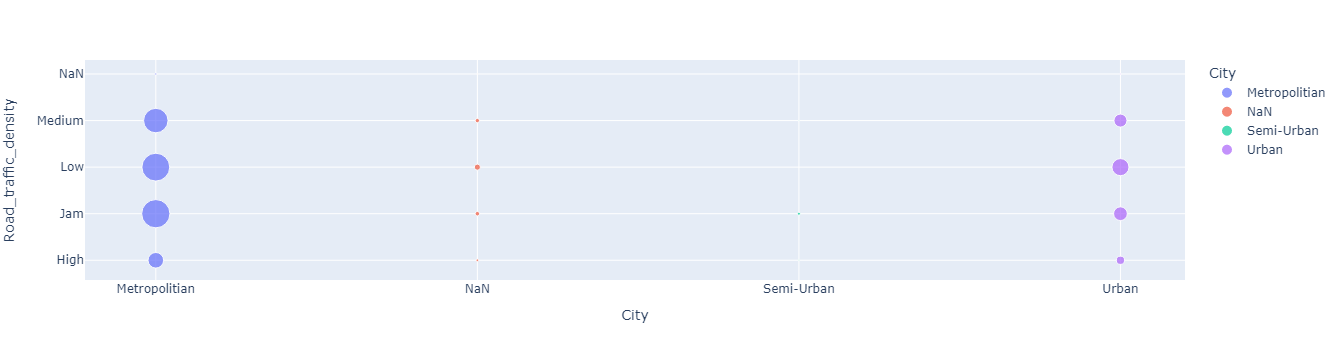

In [171]:
df_aux = df.loc[:, ['ID', 'City', 'Road_traffic_density']].groupby(['City', 'Road_traffic_density']).count().reset_index()

# Removendo valores NaN

df_aux = df_aux.loc[df_aux['City'] != 'NaN ', :]
df_aux = df_aux.loc[df_aux['Road_traffic_density'] != 'NaN ', :]

# Fazendo um gráfico de bolhas

px.scatter(df_aux, x = 'City', y = 'Road_traffic_density', size='ID', color='City')

# 5. A quantidade de pedidos por entregador por semana.


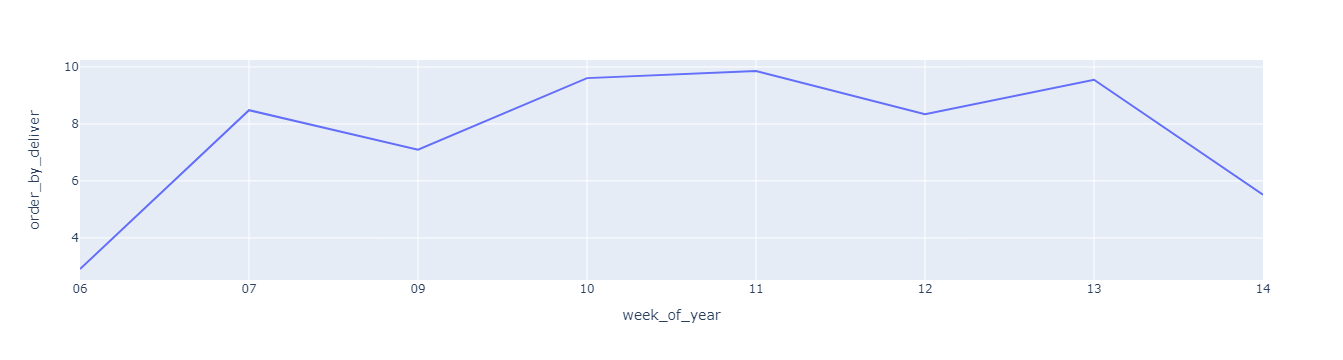

In [172]:
# Quantidade de pedidos dividos pelo número único de entregadores por semana
df_aux01 = df.loc[:, ['ID', 'week_of_year']].groupby(['week_of_year']).count().reset_index()
df_aux02 = df.loc[:, ['Delivery_person_ID', 'week_of_year']].groupby(['week_of_year']).nunique().reset_index()

# Juntar 2 dataframes
df_aux = pd.merge(df_aux01, df_aux02, how='inner')
df_aux['order_by_deliver'] = df_aux['ID'] / df_aux['Delivery_person_ID'] 

px.line(df_aux, x = 'week_of_year', y='order_by_deliver')

# 6. A localização central de cada cidade por tipo de tráfego.


In [173]:
import folium
df_aux = df.loc[:, ['City', 'Road_traffic_density', 'Delivery_location_latitude', 'Delivery_location_longitude']].groupby(['City','Road_traffic_density']).median().reset_index()

# Limpandos NaN
df_aux = df_aux.loc[df_aux['City'] != 'NaN ', :]
df_aux = df_aux.loc[df_aux['Road_traffic_density'] != 'NaN', :]

map = folium.Map()
for index, location_info in df_aux.iterrows():
    folium.Marker([location_info['Delivery_location_latitude'],
                  location_info['Delivery_location_longitude']],
                  popup=location_info[['City', 'Road_traffic_density']]).add_to(map)
map

# 2.0 Visão: Entregadores

### 1. A menor e maior idade dos entregadores.

In [174]:
# Maior idade dos entregadores
maior_idade = df['Delivery_person_Age'].max()
print(f"Essa é a maior idade dos entregadores {maior_idade}")

Essa é a maior idade dos entregadores 50


In [175]:
# MNenor idade dos entregadores
menor_idade = df['Delivery_person_Age'].min()
print(f"Essa é a menor idade dos entregadores {menor_idade}")

Essa é a menor idade dos entregadores 15


### 2. A pior e a melhor condição de veículos.

In [176]:
# A pior condição de veículos
pior_condicao = df['Vehicle_condition'].min()
print(f"Essa é a pior condicao dos veiculos {pior_condicao}")

Essa é a pior condicao dos veiculos 0


In [177]:
# A pior condição de veículos
melhor_condicao = df['Vehicle_condition'].max()
print(f"Essa é a melhor condicao dos veiculos {melhor_condicao}")

Essa é a melhor condicao dos veiculos 3


### 3. A avaliação média por entregador.

In [178]:
df_aux01 = df.loc[:, ['Delivery_person_ID', 'Delivery_person_Ratings']].groupby(['Delivery_person_ID']).mean().reset_index()
df_aux01

,Delivery_person_ID,Delivery_person_Ratings
0,AGRRES010DEL01,4.761538
1,AGRRES010DEL02,4.671429
2,AGRRES010DEL03,4.575000
3,AGRRES01DEL01,4.522222
4,AGRRES01DEL02,4.700000
...,...,...
1315,VADRES19DEL02,4.625862
1316,VADRES19DEL03,4.670270
1317,VADRES20DEL01,4.626786
1318,VADRES20DEL02,4.593617


### 4. A avaliação média e o desvio padrão por tipo de tráfego.


In [179]:
df_avg_std_rating_by_traffic = (df.loc[:, ['Delivery_person_Ratings', 'Road_traffic_density']].groupby(['Road_traffic_density'])
                            .agg({'Delivery_person_Ratings': ['mean', 'std']}))

# Mudando nomes das colunas
df_avg_std_rating_by_traffic.columns = ['delivery_mean', 'delivery_std']

# Resetando o index
df_avg_std_rating_by_traffic = df_avg_std_rating_by_traffic.reset_index()
df_avg_std_rating_by_traffic

,Road_traffic_density,delivery_mean,delivery_std
0,High,4.653492,0.272312
1,Jam,4.595395,0.328749
2,Low,4.646780,0.335426
3,Medium,4.660627,0.273472
4,NaN,3.912088,2.479464


### 5. A avaliação média e o desvio padrão por condições climáticas.

In [180]:
# Limpando linhas vazias
linhas_nao_vazias = df['Weatherconditions'] != 'conditions NaN'
df = df.loc[linhas_nao_vazias, :]
df_avg_std_rating_by_weather = (df.loc[:, ['Delivery_person_Ratings', 'Weatherconditions']].groupby(['Weatherconditions'])
                                .agg({'Delivery_person_Ratings' : ['mean', 'std']}))

# Mudando os nomes das colunas
df_avg_std_rating_by_weather.columns = ['weather_mean', 'weather_std']

# Resetando index
df_avg_std_rating_by_weather = df_avg_std_rating_by_weather.reset_index()
df_avg_std_rating_by_weather

,Weatherconditions,weather_mean,weather_std
0,conditions Cloudy,4.652190,0.280269
1,conditions Fog,4.653549,0.273893
2,conditions Sandstorms,4.613000,0.309512
3,conditions Stormy,4.613369,0.311624
4,conditions Sunny,4.658030,0.393090
5,conditions Windy,4.617804,0.303464


### 6. Os 10 entregadores mais rápidos por cidade.

In [181]:
# Formas de limpar a coluna 'Time_taken(min)'
# Forma 01 - split
#df.loc[0, 'Time_taken(min)'].split(' ')[1]

# Forma 02
#df.loc[0, 'Time_taken(min)'].replace('(min) ', '')

# Forma 03 - Regex
#df.loc[0, 'Time_taken(min)'] = re.findall(r'\d+', df.loc[i, 'Time_taken(min)'])
#df.loc[0, 'Time_taken(min)']

In [194]:
# Limpando NaN de Cidade
linhas_nao_vazias = df['City'] != 'NaN '
df = df.loc[linhas_nao_vazias, :]

df_fastest_delivery_city = df.loc[:, ['Delivery_person_ID', 'City', 'Time_taken(min)']].groupby(['City', 'Delivery_person_ID']).mean().reset_index()
df_fastest_delivery_city = df_fastest_delivery_city.sort_values(['City', 'Time_taken(min)'], ascending=True).reset_index()
df_fastest_delivery_city.loc[df_fastest_delivery_city['City'] == 'Semi-Urban']

,index,City,Delivery_person_ID,Time_taken(min)
1979,2042,Semi-Urban,INDORES16DEL01,44.0
1980,2084,Semi-Urban,MYSRES18DEL01,44.0
1981,2113,Semi-Urban,SURRES19DEL01,44.0
1982,1994,Semi-Urban,BANGRES18DEL03,45.0
1983,2112,Semi-Urban,SURRES12DEL03,45.0
...,...,...,...,...
2119,2076,Semi-Urban,MYSRES12DEL01,54.0
2120,2078,Semi-Urban,MYSRES13DEL02,54.0
2121,2088,Semi-Urban,PUNERES13DEL02,54.0
2122,2120,Semi-Urban,VADRES13DEL01,54.0


In [195]:
df_aux01 = df_fastest_delivery_city.loc[df_fastest_delivery_city['City'] == 'Metropolitian', :].head(10)
df_aux02 = df_fastest_delivery_city.loc[df_fastest_delivery_city['City'] == 'Urban', :].head(10)
df_aux03 = df_fastest_delivery_city.loc[df_fastest_delivery_city['City'] == 'Semi-Urban', :].head(10)

df_new = pd.concat([df_aux01, df_aux02, df_aux03]).reset_index()
df_new

,level_0,index,City,Delivery_person_ID,Time_taken(min)
0,0,730,Metropolitian,KNPRES03DEL02,15.750000
1,1,67,Metropolitian,ALHRES02DEL02,17.800000
2,2,723,Metropolitian,KNPRES01DEL01,19.125000
3,3,845,Metropolitian,KOLRES01DEL03,19.125000
4,4,787,Metropolitian,KOCRES02DEL02,19.250000
5,5,806,Metropolitian,KOCRES08DEL03,19.800000
6,6,827,Metropolitian,KOCRES16DEL03,20.000000
7,7,788,Metropolitian,KOCRES02DEL03,20.375000
8,8,519,Metropolitian,GOARES14DEL01,20.400000
9,9,479,Metropolitian,DEHRES20DEL03,20.428571


In [191]:
df['City'].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', 'NaN'], dtype=object)